***
# Ensemble Learning
***

#### What is it?

> Ensemble learning is a model that makes predictions based on a number of different combined models. Ensemble models combine the decisions from multiple models to improve the overall model performance. In this notebook, we will focus on tree-based ensemble leaning algorithms. 

> Ensemble methods:
    
        - Bagging: Training a bunch of individual models in a parallel fashion.
        - Boosting: Training a bunch of individual models in a sequential way
    
 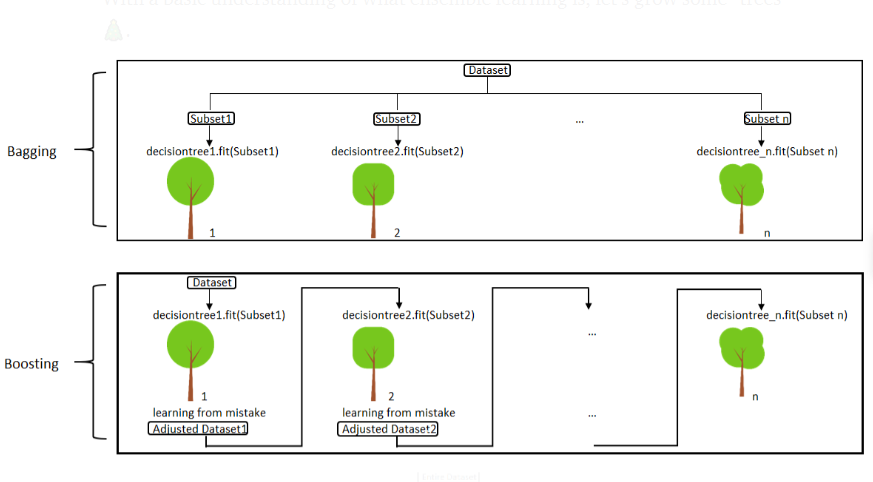

#### Random Forest

> Random forest is an ensemble model that uses bagging as the ensemble method. Steps:

        - 1. Select n random subsets from the training set
        - 2. Train n decision trees
        - 3. Each tree predicts the labels in test set
        - 4. Make a final prediction (majority vote)
        
        
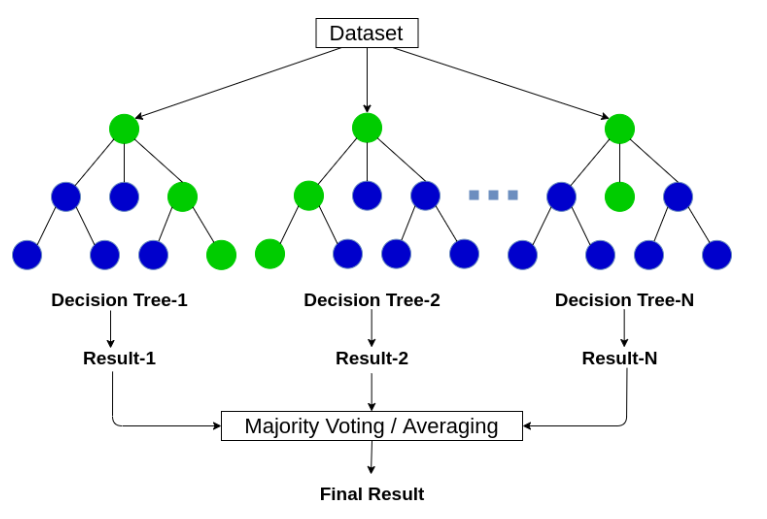

#### AdaBoost (Adaptive Boosting)

> AdaBoost is another ensemble model. AdaBoost goal is to learn from the previous mistakes of incorrectly classified data points. AdaBoost works well with decision tree. Steps:

        - 1. Initialize weights of data points
        - 2. Train a decision tree
        - 3. Calculate weighted error of the decision tree
        - 4. Calculate the decision tree's weight in the ensemble
        - 5. Update weights of wrongly classified points
        - 6. Repeat until the number of trees set to train is reached
        - 7. Make final prediction
 
 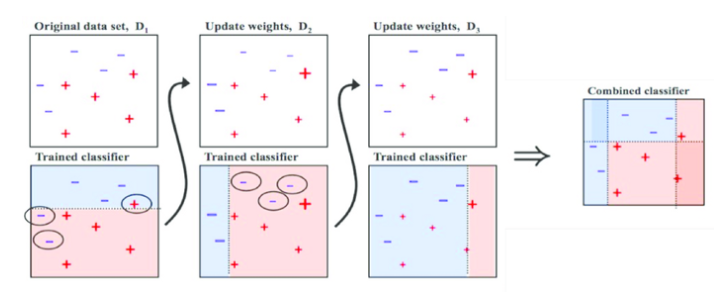 
        

#### Gradient Boosting

> Rather than updating the weights of the data points, gradient boosting learns from the residual error. Steps:

        - 1. Train a decision tree
        - 2. Use trained tree to predict
        - 3. Calculate the residual of the tree and save the residual errors as new y
        - 4. Repeat until the number of trees set to train is reached
        - 5. Make a final prediction

### Implementation using Scikit Learn

> Below is an implementation of the three ensemble methods on a dataset. 

#### Libraries Used

[AccuracyScore](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)


In [1]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import numpy as np

import pandas as pd

from palmerpenguins import load_penguins

#### Data Preparation

> Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#load in data
penguins = load_penguins()

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 333 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
328,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and bill length are selected as features, while the response is species (Adelie, Chinstrap, or Gentoo).

In [4]:
#features
X = df[["body_mass_g", "bill_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()

> Next, the data is then divided into train and test sets. Below, 70% of the data will be used to train the model, while 30% of the data will be used to test the model.

In [5]:
#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=89)

#### Model Building

> Below, a decision tree model is fit by passing X_train and y_train to clf.fit(). Then predictions are made by passing X_test to clf.predict. Finally, the accuracy of the model is calculated below. Alone, the decision tree model has an accuracy of 0.91.

In [6]:
#decision tree model fit.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#predictions made
y_pred = clf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)

0.91

> Below, a Random Forest model is fit by passing X_train and y_train to RFclf.fit(). Then predictions are made by passing X_test to RFclf.predict. Finally, the accuracy of the model is calculated below. The accuracy of this model is 0.96. Compared to the decision tree model, we can see that the accuracy is higher.

In [7]:
#Random forest model fit
RFclf = RandomForestClassifier()
RFclf.fit(X_train, y_train)

#predictions made
y_pred = RFclf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)


0.96

> Below, an AdaBoost model is fit by passing X_train and y_train to ADAclf.fit(). Then predictions are made by passing X_test to ADAclf.predict. Finally, the accuracy of the model is calculated below. The accuracy of this model is 0.84. Compared to the decision tree model, we can see that the accuracy is lower.

In [8]:
#AdaBoost model fit
ADAclf = AdaBoostClassifier()
ADAclf.fit(X_train, y_train)

#predictions made
y_pred = ADAclf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)


0.84

> Below, a Gradient Boost model is fit by passing X_train and y_train to GBclf.fit(). Then predictions are made by passing X_test to GBclf.predict. Finally, the accuracy of the model is calculated below. The accuracy of this model is 0.91. Compared to the decision tree model, we can see that the accuracy is higher.

In [9]:
#gradient boost model fit
GBclf = GradientBoostingClassifier(n_estimators=100)
GBclf.fit(X_train, y_train)

#predictions made
y_pred = GBclf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)


0.91

#### Conclusion

> Most of the ensemble models outperformed the decision tree model. Another way to create an ensemble is to use Scikit Learn's  [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to combine multiple models into a single model that out performs the individual models. VotingClassifier() allows the user to combine a number of models (such as KNN, Naive Bayes, Logistic, etc.) into one to boost the model performance. 